# Name : Bhavik Ransubhe
# Class : B.E (B) COMP
# Roll No. : 41261

## MLDS Practical Assessment 
## Problem statement : Clustering on Mall Dataset

In [1]:
#Importing libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load data
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Exploring Data**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Annual income and spending score have higher sd than age, meaning that they are dispersed and may help clustering.

**Visualizing the data**

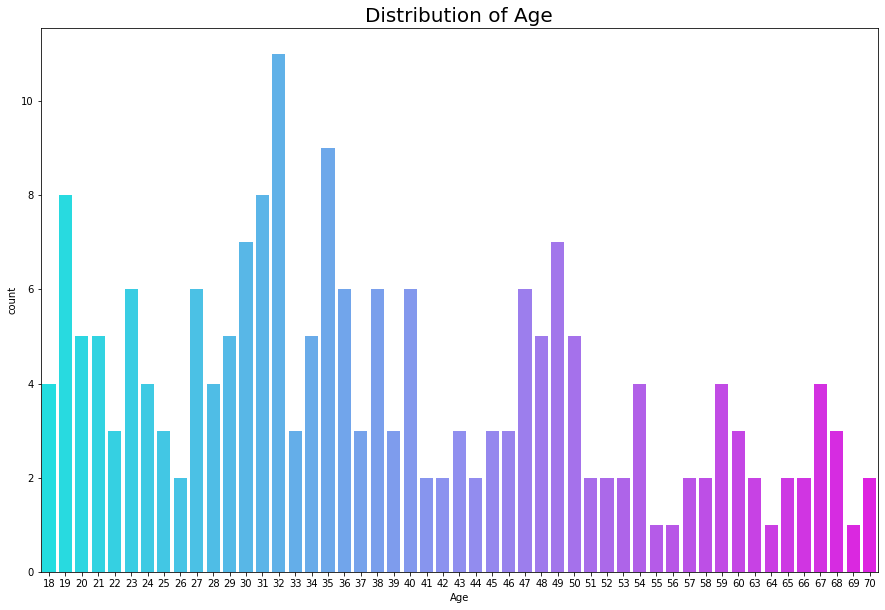

In [6]:
plt.figure(figsize=(15,10))
sns.countplot(df['Age'], palette = 'cool')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

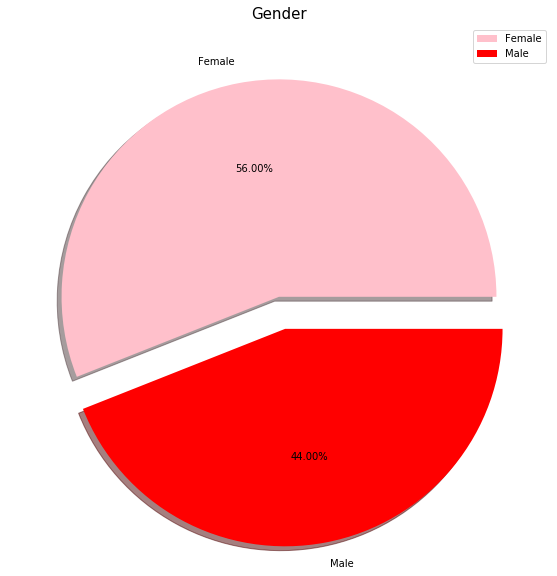

In [7]:
# Ratio of male and female
plt.figure(figsize=(10,10))
size = df['Genre'].value_counts()
colors = ['pink', 'red']
plt.pie(size, colors = colors, explode = [0, 0.15], labels = ['Female', 'Male'], shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 15)
plt.axis('off')
plt.legend()
plt.show()

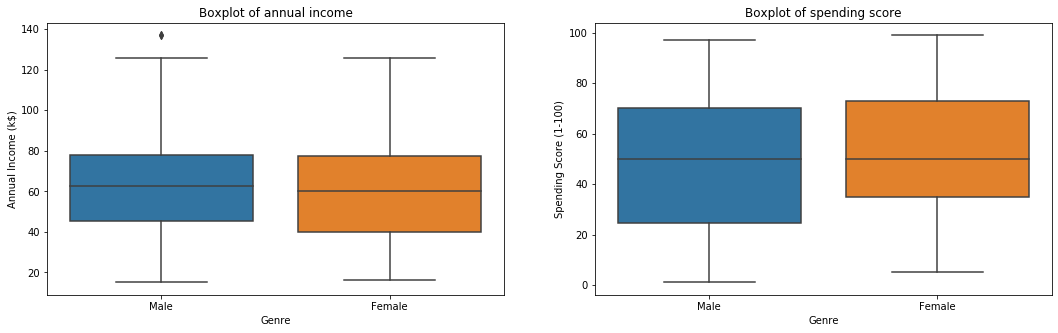

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,5))
sns.boxplot(x='Genre', y='Annual Income (k$)', data=df, ax=ax1)
ax1.set_title('Boxplot of annual income')

sns.boxplot(x='Genre', y='Spending Score (1-100)', data=df, ax=ax2)
ax2.set_title('Boxplot of spending score')

plt.show()

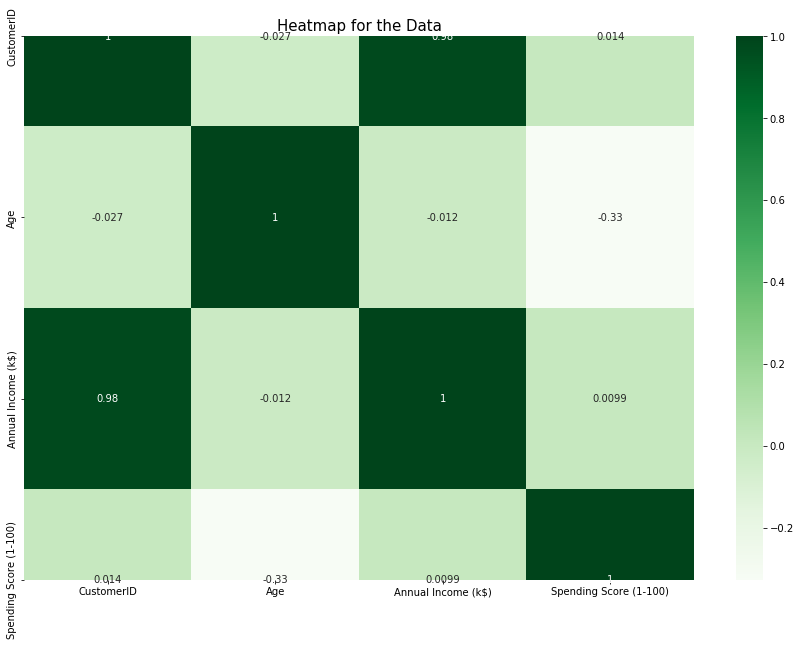

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap = 'Greens', annot = True)
plt.title('Heatmap for the Data', fontsize = 15)
plt.show()

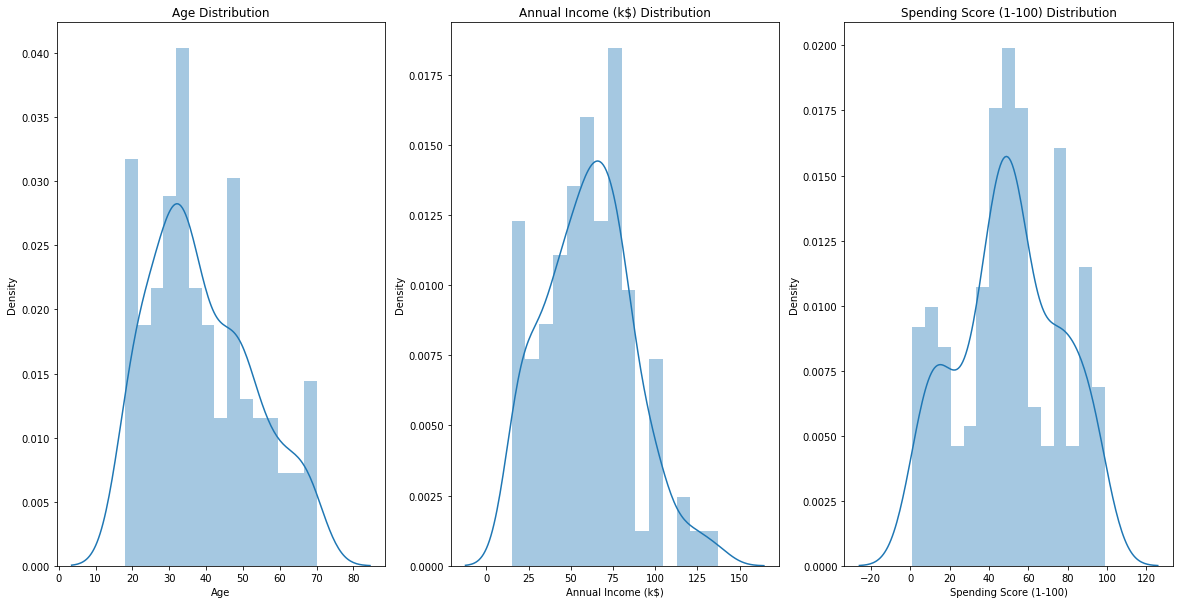

In [10]:
plt.figure(figsize = (20 , 10))
n=1
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.2)
    sns.distplot(df[x], bins = 15)
    plt.title('{} Distribution'.format(x))
    n+=1

If we take a deep dive into the features, it is observed that spending score has 3 peaks(0-20,40-60,80-100), as for annual income, it tends to right-skewed.

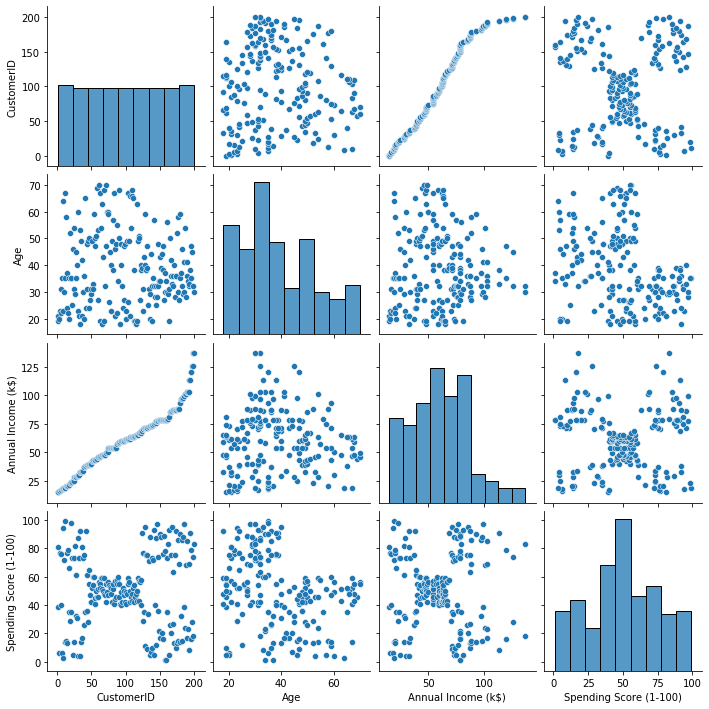

In [11]:
sns.pairplot(df)

if we look at the pairplot of annual income and spending score, it is obvious that the customers can be divided into 5

In [12]:
X = df.loc[:, ['Annual Income (k$)', 'Spending Score (1-100)']]

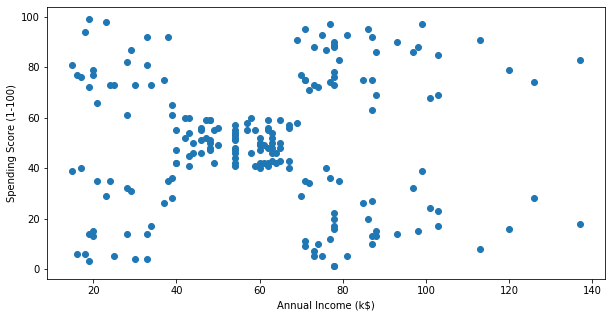

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(x= X['Annual Income (k$)'], y=X['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)');

## Using Clustering Alogorithms:
### 1. KMeans

The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-square

In [14]:
from sklearn.cluster import KMeans

**Finding the Optimal Number of Clusters :**

plots the value of cost function produced by different values of k. When k increases, the data-point can be further "voted" to the nearest cluster and the distances between the respective centroids will decrease. However, the improvements in sum of squared error (SSE) will decline and start to level-off with the increase of k. Such distortion resembles "elbow".

In [15]:
seed = 0
wcss = [] #Within cluster sum squares
for i in range(2,15):
    km = KMeans(n_clusters= i, random_state=seed)
    km.fit(X)
    wcss.append(km.inertia_)

We have a performance metric. it's called inertia: it's the mean squared distance between each instance and its closest centroid.

Lets plot it 

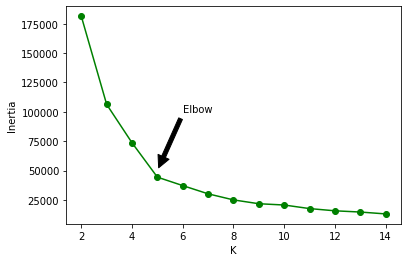

In [16]:
plt.plot(range(2,15), wcss, 'og-')
plt.annotate('Elbow', xy=(5, 50000), xytext=(6, 100000), arrowprops=dict(facecolor='black', shrink=0.05))
plt.xlabel("K")
plt.ylabel("Inertia");

As you can see, the inertia drops very quickly as we increase k up to 5, but then it decreases much more slowly as we keep increasing k.

Let's do clustering with k=5

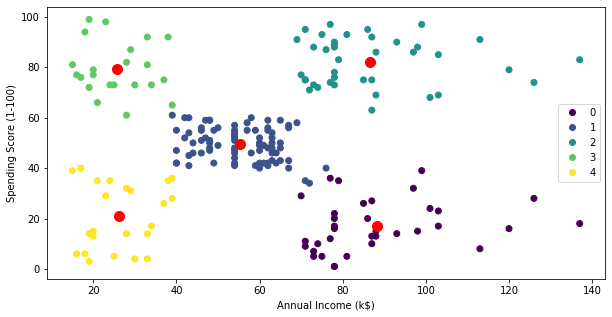

In [17]:
km = KMeans(n_clusters = 5, random_state=seed)
km.fit(X)

plt.figure(figsize=(10,5))
scatter = plt.scatter(x= X.iloc[:, 0], y=X.iloc[:, 1], c= km.labels_)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroid')   
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(handles=scatter.legend_elements()[0], labels=[0, 1, 2, 3, 4]);

The customers in first cluster(Purple) have lower spending score but have a high annual income. <br>
In case of the second cluster(blue),customers have average annual income as well as average spending score.<br>
People with both higher annual income and higher spending score belong to third cluster(dark green).<br>
The customers in fourth cluster(green) have lower annual income but higher spending score.<br>
People in fifth cluster(yellow) have lower spending score and low annual income!

## 2. Hierarchical Clustering

In [18]:
from sklearn.cluster import AgglomerativeClustering 

Using the dendrogram to find the optimal number of clusters

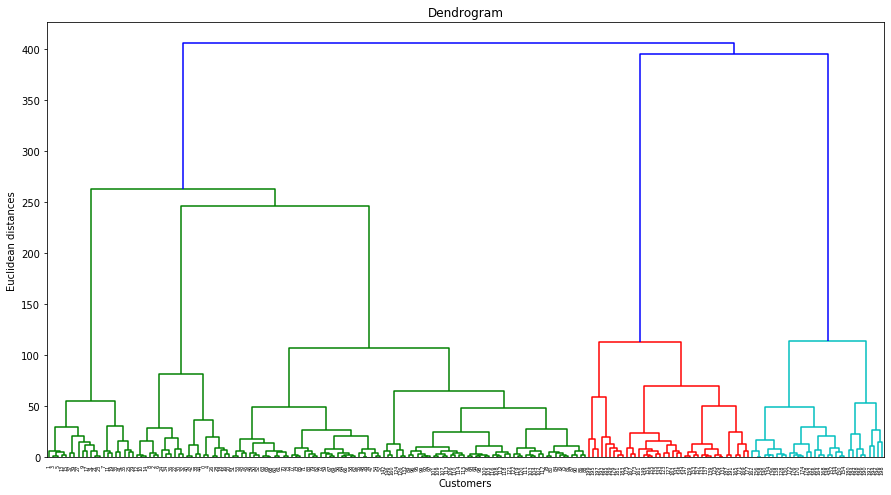

In [19]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

From the graph, we can identify that the ideal number of clusters is 5

Training the Hierarchical Clustering model on the dataset

In [20]:
X = df.iloc[:, [3, 4]].values

In [21]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

Visualising the clusters

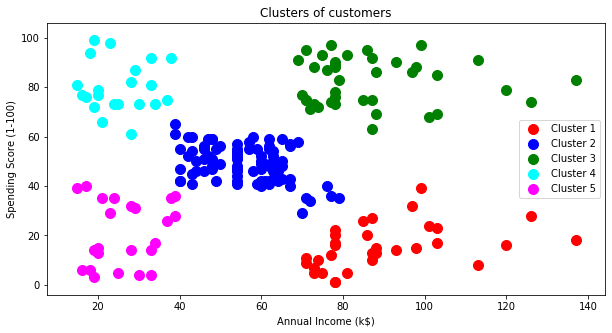

In [22]:
plt.figure(figsize=(10,5))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

The customers in first cluster(red) have lower spending score but have a high annual income. <br>
In case of the second cluster(blue),customers have average annual income as well as average spending score.<br>
People with both higher annual income and higher spending score belong to third cluster(dark green).<br>
The customers in fourth cluster(cyan) have lower annual income but higher spending score.<br>
People in fifth cluster(pink) have lower spending score and low annual income!

**After comparing both the models i.e K-Means & Hierarchical clustering we can conclude that :<br>
Both gave similar results & both were accurate**